In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Problem 1: Fashion MNIST Clothing Classification

Fashion-MNIST is a dataset of Zalando's article images.
Each example is a 28x28 grayscale image, associated with a label from 10 classes.
The Fashion-MNIST dataset was proposed as a more challenging replacement dataset for the MNIST dataset.

In [2]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fashion-mnist_train.csv'
data = pd.read_csv(url)
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0,0.0,0.0,0.003922,0.0,0.0,0.0,0.0,0.0,0.0,...,0.462745,0.400000,0.40000,0.188235,0.0,0.0,0.003922,0.0,0.0,0.0
3,8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003045,0.002876,0.00303,0.002968,0.0,0.0,0.000000,0.0,0.0,0.0
4,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [3]:
data.shape

(5000, 785)

In [4]:
y = data.label.to_numpy() # labels 
X = data.iloc[:,1:785].to_numpy() # pixels

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. 
This pixel-value is an integer between 0 and 1.

The following figure shows a few images from the fashion-MNIST dataset

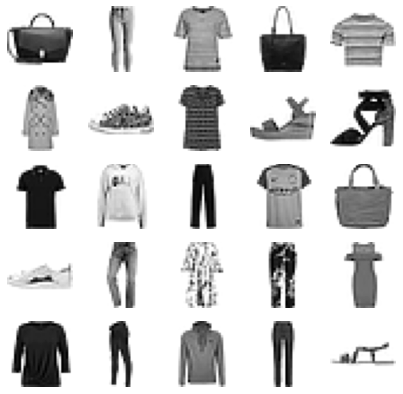

In [5]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X[i].reshape(28,28),cmap='binary')
    plt.axis('off')    

**Labels:**

| Label | Description |
| :- | -: |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

**The goal** is to use the knn classifier to predict the labels of clothing images.

## Part 1

Split the dataset into training, validation and test sets.

In [6]:
# shuffle the data
per = np.random.permutation(len(data))
X = X[per]
y = y[per]

In [7]:
X_train, y_train = X[0:3000],y[0:3000] # training set
X_val, y_val = X[3000:5000],y[3000:5000] # validation set

## Part 2

Use the validation set to tune-in the parameters of the knn classifier (k and weights).

In [8]:
# knn classifier function
def knn_classifier(X,y,X_new,k, weights='uniform'):
    'no-loop version V2'
    
    m,_ = X.shape
    m_new,_ = X_new.shape
    
    # number of classes
    n_classes = len(np.unique(y))        
    
    # distance matrix
    dist = np.sqrt(np.square(X_new).sum(axis=1).reshape([m_new,1])+np.square(X).sum(axis=1).reshape([1,m])-2*X_new.dot(X.T))
    
    # k nearest neighbor
    knn = np.argsort(dist,axis=1)[:,0:k]
    
    y_pred = np.zeros(m_new)
    for i in range(m_new):
        # labels
        nearest_labels = y[knn[i]]
        # weights
        if weights=='uniform':
            w = np.ones(k)
        elif weights=='distance':
            w=1/dist[i,knn[i]]
        # prediction
        y_pred[i] = np.argmax(np.bincount(nearest_labels, minlength=n_classes, weights=w))
    
    return y_pred

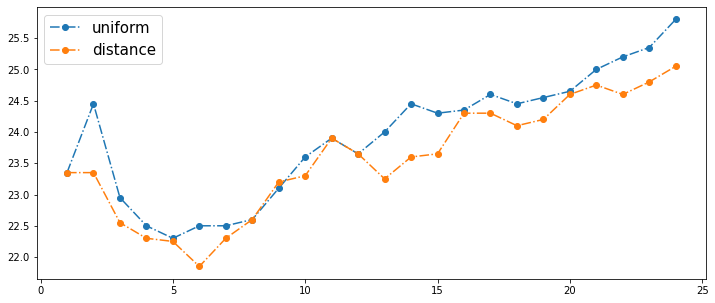

In [9]:
weights = ['uniform', 'distance']
k_list = np.arange(1,25)

plt.figure(figsize=(12,5))

for i in range(len(weights)):
    pct_incorrect = np.zeros(len(k_list))
    for j in range(len(k_list)):
        y_val_pred = knn_classifier(X_train,y_train,X_val,
                                    k = k_list[j],
                                    weights=weights[i])
        # percentage of incorrect classification
        pct_incorrect[j] = 100*np.sum(y_val!=y_val_pred)/len(y_val)
    plt.plot(k_list, pct_incorrect,'o-.', label=weights[i])
plt.legend(fontsize=15)

In [10]:
# optimal parameters
k = 6
weights = 'distance'

## Part 3

Test your classifier on the following test set

In [11]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fashion-mnist_test.csv'
test_data = pd.read_csv(url)
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0.0,0.0,0.0,0.000015,0.0,0.0,0.000492,0.001569,0.000323,...,0.003306,0.003291,0.003353,0.003383,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,6,0.0,0.0,0.0,0.000015,0.0,0.0,0.000000,0.000000,0.000000,...,0.001353,0.001261,0.000877,0.000677,0.000723,0.000000,0.000000,0.000031,0.000031,0.0
2,8,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.517647,0.823529,0.698039,0.588235,0.000000,0.000000,0.0
4,9,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [17]:
y_test = test_data.label.to_numpy() # labels 
X_test = test_data.iloc[:,1:785].to_numpy() # pixels

In [20]:
y_test_pred = knn_classifier(X_train,y_train,X_test,
                             k = 6,
                             weights='distance')

In [21]:
100*np.sum(y_test==y_test_pred)/len(y_test)

77.15

In [22]:
'confusion matrix'
n_classes = len(np.unique(y))
C = np.zeros((n_classes,n_classes))
for i in range(n_classes):
    for j in range(n_classes):
        C[i,j] = sum(y_test_pred[y_test==i]==j)
C

array([[166.,   0.,   6.,   5.,   2.,   0.,  16.,   0.,   0.,   0.],
       [  0., 192.,   4.,   7.,   2.,   0.,   3.,   0.,   0.,   0.],
       [  3.,   0., 132.,   1.,  20.,   0.,  45.,   0.,   1.,   0.],
       [ 18.,   2.,   3., 164.,  11.,   0.,  11.,   0.,   0.,   0.],
       [  0.,   0.,  23.,  11., 131.,   0.,  27.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 109.,   2.,  29.,   2.,  28.],
       [ 54.,   1.,  35.,   7.,  24.,   0., 106.,   0.,   1.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   4.,   0., 189.,   0.,  13.],
       [  1.,   0.,   6.,   2.,   5.,   1.,   5.,   0., 163.,   2.],
       [  0.,   0.,   0.,   1.,   0.,   0.,   1.,  12.,   0., 191.]])